In [1]:
import numpy as no
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# getting drug sales dataset
file_path = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(file_path , parse_dates = ['date'],index_col = 'date')
df.head(12)

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
1991-12-01,4.306371
1992-01-01,5.088335
1992-02-01,2.814520
1992-03-01,2.985811


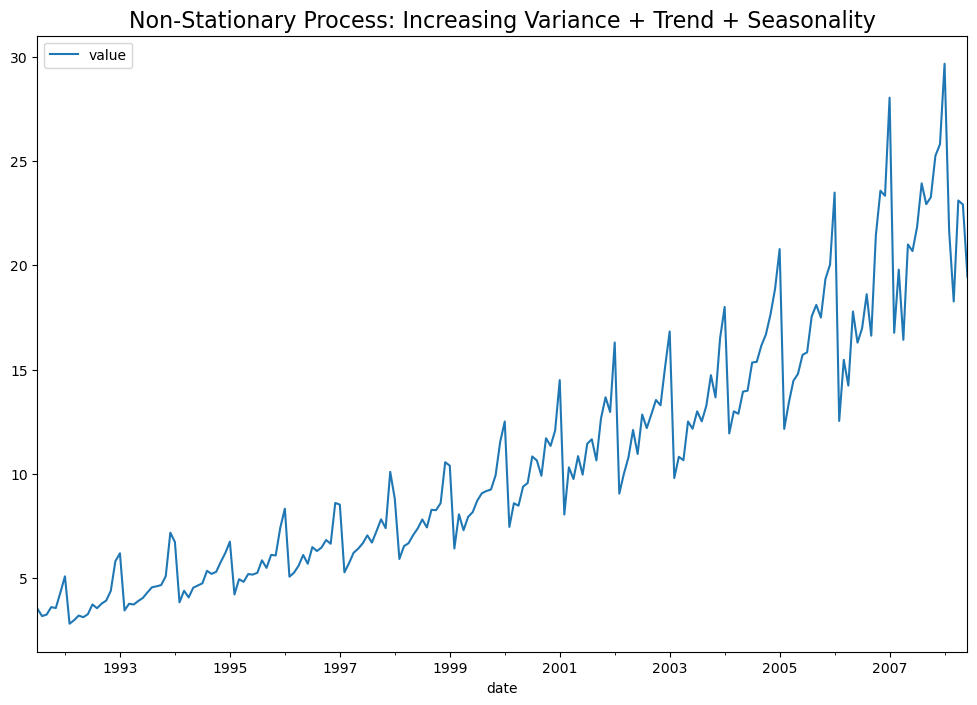

In [5]:
## 비정상성을 확인 추세와 계절성 을 제거할 필요가 있어보임
df.plot(figsize=[12, 8]) 
plt.title('Non-Stationary Process: Increasing Variance + Trend + Seasonality', 
fontsize=16) 
plt.show()

## 차분
위의 시계열 그래프에서 볼 수 있는 것처럼, (a) 분산이 시간의 흐름에 따라 증가
하고 (분산이 고정이 아님), (b) 추세(trend)가 있으며, (c) 1년 주기의 계절성
(seasonality)이 있으므로, 비정상확률과정(non-stationary process)이다

In [6]:
## variance Stabilizing Transformation(VST) by Taking Logarithm
df_vst = np.log(df.value)
df_vst.head()

date
1991-07-01    1.260332
1991-08-01    1.157161
1991-09-01    1.179338
1991-10-01    1.283986
1991-11-01    1.271408
Name: value, dtype: float64

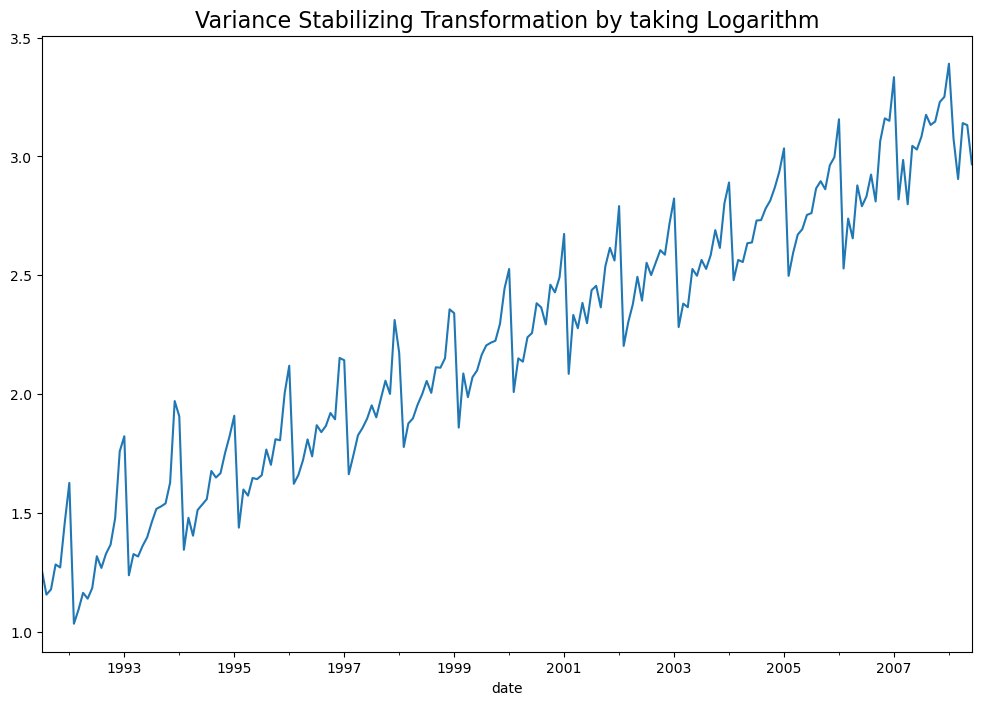

In [7]:
## plotting
df_vst.plot(figsize=(12,8))
plt.title("Variance Stabilizing Transformation by taking Logarithm", fontsize=16) 
plt.show()

추세가 있는 경우 차분을 통한 추세 제거 (de-trend by differencing)
차분(differencing)은 현재의 시계열 값에서 시차 t 만큼의 이전 값을 빼주는 것이다.
1차 차분 = Delta1_Z(t) = Z(t) - Z(t-1)
2차 차분 = Delta2_Z(t) = Z(t) - Z(t-1) - (Z(t-1) - Z(t-2)) = Z(t) - 2Z(t-1) + Z(t-2)
Python의 diff() 메소드를 사용해서 차분을 해줄 수 있다. 
이때 차분의 차수 만큼 결측값이 생기는 데요, dropna() 메소드를 사용해서 결측값은
제거


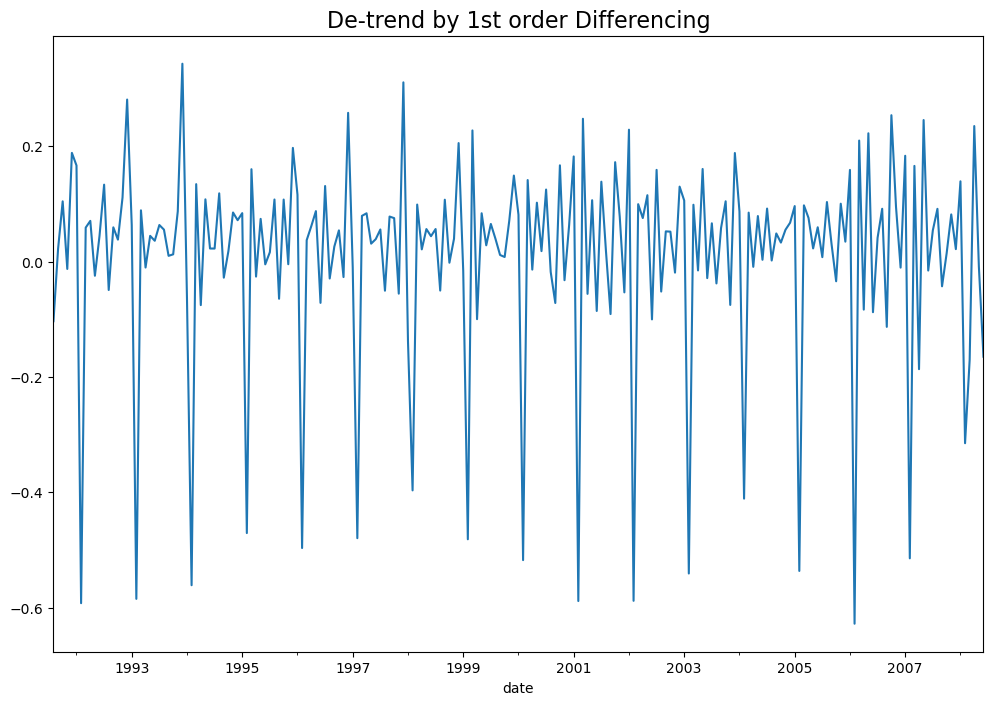

In [10]:
## De-trend by Differencing
df_vst_diff1 = df_vst.diff(1).dropna() 
df_vst_diff1
plt.figure(figsize=(12,8))
df_vst_diff1.plot()
plt.title("De-trend by 1st order Differencing", fontsize=16) 
plt.show()

    •  계절성이 있는 경우 계절 차분을 통한 계절성 제거 (de-seasonality by seaanl differencing)
    • 아직 남아있는 계절성(seasonality)을 계절 차분(seasonal differencing)을 사용해서 제거.
    • 1년 12개월 주기의 계절성을 띠고 있으므로 diff(12) 함수로 계절 차분을 실시하고, 12개의 결측값이 생기는데요 dropna() 로 결측값은 제거

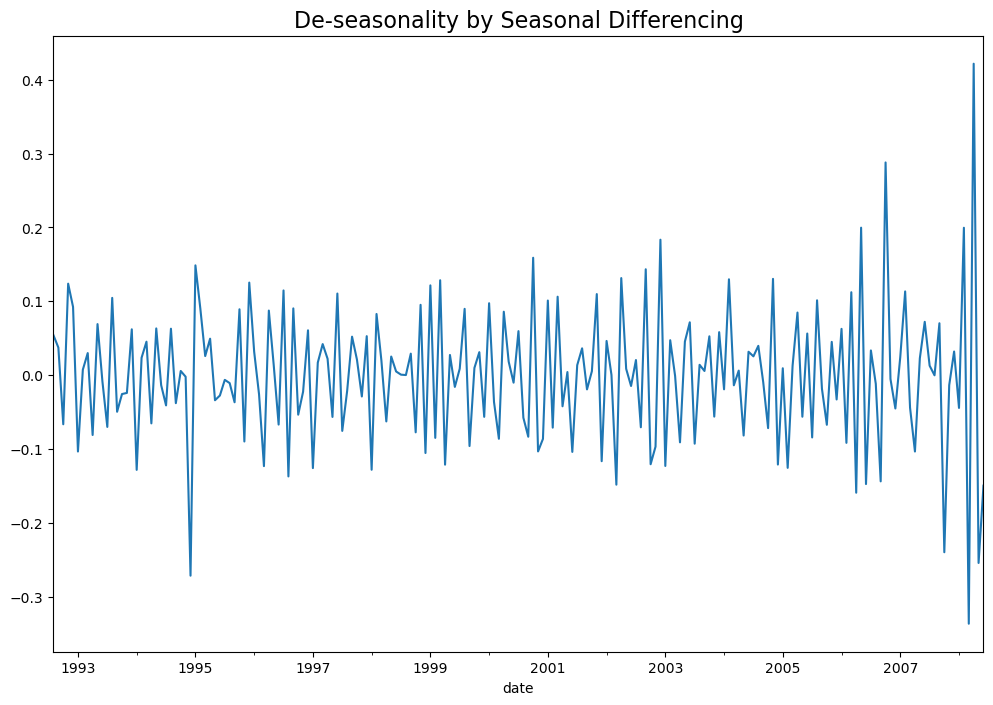

In [13]:
## Stationary Process: De-seasonality by Seasonal Differencing
df_vst_diff1_diff12 = df_vst_diff1.diff(12).dropna()
## plotting
plt.figure(figsize=(12,8))
df_vst_diff1_diff12.plot()
plt.title("De-seasonality by Seasonal Differencing", fontsize=16) 
plt.show()

비정상 시계열(non-stationary process)이었던 원래 데이터

    (1) log transformation을 통한 분산 안정화
    (2) 차분(differencing)을 통한 추세 제거
    (3) 계절 차분(seasonal differencing)을 통한 계절성 제거를 모두 마쳐서 정상 시계열(stationary process) 로 변환